In [ ]:
import csv
from gensim.models import FastText

# Fungsi untuk membaca dataset dalam format CSV
def read_csv_data(filename):
    sentences = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            sentences.append(row[0].split())
    return sentences

# Membaca dataset dari file CSV
data_file = 'Training_Testing_Data16444.csv'
sentences = read_csv_data(data_file)

# Melatih model FastText dengan metode CBOW
model = FastText(sentences, sg=1, window=5, min_count=2, workers=2, min_n=3, max_n=5)

# Menyimpan model ke dalam file
model_file = 'fasttext_model.bin'
model.save(model_file)


In [ ]:
# Meload model FastText yang telah disimpan
model = FastText.load(model_file)

# Mengambil vektor representasi kata
word = 'anies'
word_vector = model.wv[word]
print(f"Vektor representasi '{word}': {word_vector}")


Vektor representasi 'anies': [-0.86202884 -0.3237267   0.5979446   0.65064305  0.6158966  -0.55945927
  0.38160044  0.17379475 -0.3369219  -0.59221375 -0.47261825 -0.76942736
  0.00827784 -0.341363   -0.26165894 -0.53073657  0.8933996  -0.01177962
 -0.2405884   0.04084529 -0.15483975 -0.7576117  -0.570836   -0.06870946
 -0.36144066  0.13067971 -0.15173993 -0.21350421 -0.2831071   0.78405386
 -0.02240013 -0.2896711   0.14202686 -0.01063326 -0.24538866  0.29068357
 -0.23549853 -0.50657195  0.15680514  0.0971636  -0.14739871 -0.05832376
  0.09275801 -0.3608021   0.23494479 -0.21545982 -0.01865943  0.21938403
 -0.3852056   0.0431745  -0.06579136  0.06409144  0.3991709  -0.23235315
  0.14606875 -0.02333824  0.20437458  0.08999148 -0.1799451  -0.3881599
 -0.05957504 -0.10750063 -0.12180462 -0.45556724  0.07741519  0.56190807
 -0.01602461  0.02464043  0.3225277   0.35591573  0.25654522  0.1485173
 -0.02809615 -0.10742108  0.6538995   0.35231784 -0.39996207 -0.13619094
 -0.12193434  0.59485996

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

#import the required library
import pandas as pd

from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
from keras.layers import LSTM, Flatten, Dropout, Conv1D, Input
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, AveragePooling1D, GlobalAveragePooling1D, Dropout, LSTM, concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [ ]:
# Baca dataset tweet ke dalam DataFrame
df = pd.read_csv('Training_Testing_Data16444.csv')

# Preprocessing teks jika diperlukan
df['text'] = df['text'].str.lower()

# # Gabungkan label dan teks ke dalam satu kolom dengan format yang diperlukan
# df['fasttext_input'] = '__label__' + df['Label'].astype(str) + ' ' + df['text']


In [ ]:
# Assuming 'text' is the column containing the text data in your DataFrame
texts = df['text'].tolist()

# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(texts)

# Limit the tokenizer vocabulary to the top n words
top_n = 10000  # Set the desired number of top words
tokenizer.num_words = top_n

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)


In [ ]:
# Hitung panjang maksimum dari sequences
max_length = max(len(seq) for seq in sequences)
print("Maximum sequence length:", max_length)


Maximum sequence length: 250


In [ ]:
# Assuming 'label' is the column containing the corresponding labels in your DataFrame
labels = df['Label'].tolist()

# Pad sequences to a fixed length
max_sequence_length = max_length  # Set the maximum sequence length based on the shape of X_train
# Set the desired maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.25, random_state=42)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the vocabulary size
vocab_size = min(top_n, len(tokenizer.word_index)) + 1
print("Vocabulary size:", vocab_size)


Vocabulary size: 10001


In [ ]:
import numpy as np

# Define a function to encode labels and handle unseen labels
def encode_labels(labels, classes):
    encoded_labels = np.zeros((len(labels), len(classes)))
    for i, label in enumerate(labels):
        if label in classes:
            encoded_labels[i, classes.index(label)] = 1
        else:
            encoded_labels[i, 0] = 1  # Assign unseen labels to the first class
    return encoded_labels

# Define the classes based on the unique labels in the original label list
classes = np.unique(labels).tolist()

# Encode labels for training, validation, and test sets
y_train = encode_labels(y_train, classes)
y_val = encode_labels(y_val, classes)
y_test = encode_labels(y_test, classes)


In [ ]:
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", X_val.shape)

Shape of train data: (59198, 250)
Shape of Test data: (24666, 250)
Shape of CV data: (14800, 250)


In [ ]:
import csv
from gensim.models import FastText
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, AveragePooling1D, GlobalAveragePooling1D, Dropout, LSTM, concatenate, Flatten
from tensorflow.keras import regularizers
import numpy as np

# Fungsi untuk membaca dataset dalam format CSV
def read_csv_data(filename):
    sentences = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            sentences.append(row[0].split())
    return sentences

# Membaca dataset dari file CSV
data_file = 'Training_Testing_Data16444.csv'
sentences = read_csv_data(data_file)

# Melatih model FastText dengan metode CBOW
model = FastText(sentences, sg=1, window=5, min_count=2, workers=2, min_n=3, max_n=5)

# Menyimpan model ke dalam file
model_file = 'fasttext_model.bin'
model.save(model_file)

# Load the pre-trained FastText model
fasttext_model = FastText.load(model_file)

# Get the word vectors
word_vectors = fasttext_model.wv.vectors

# Create the embedding matrix
vocab_size = word_vectors.shape[0]
embedding_vector_length = word_vectors.shape[1]
embedding_matrix = np.zeros((vocab_size, embedding_vector_length))
word_index = {word: idx for idx, word in enumerate(fasttext_model.wv.index_to_key)}
for word, index in word_index.items():
    embedding_matrix[index] = word_vectors[index]

# Define the model architecture
max_sequence_length = 250
input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False)(input_layer)

# CNN Layers
cnn_layer1 = Conv1D(128, kernel_size=3, activation='relu')(embedding_layer)
cnn_layer1 = AveragePooling1D(pool_size=2)(cnn_layer1)
cnn_layer2 = Conv1D(128, kernel_size=4, activation='relu')(embedding_layer)
cnn_layer2 = AveragePooling1D(pool_size=2)(cnn_layer2)
cnn_layer3 = Conv1D(128, kernel_size=5, activation='relu')(embedding_layer)
cnn_layer3 = AveragePooling1D(pool_size=2)(cnn_layer3)
cnn_layer1 = GlobalAveragePooling1D()(cnn_layer1)
cnn_layer2 = GlobalAveragePooling1D()(cnn_layer2)
cnn_layer3 = GlobalAveragePooling1D()(cnn_layer3)
cnn_layer = concatenate([cnn_layer1, cnn_layer2, cnn_layer3])
cnn_layer = Dropout(0.5)(cnn_layer)
cnn_layer = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(cnn_layer)
cnn_layer = Dropout(0.5)(cnn_layer)

# LSTM Layer
lstm_layer = LSTM(64)(embedding_layer)
lstm_layer = Dropout(0.5)(lstm_layer)

# Embedding Layer
embedding_only_layer = Flatten()(embedding_layer)
embedding_only_layer = Dropout(0.5)(embedding_only_layer)
embedding_only_layer = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(embedding_only_layer)
embedding_only_layer = Dropout(0.5)(embedding_only_layer)

# Concatenate all layers
merged_layer = concatenate([cnn_layer, lstm_layer, embedding_only_layer])
merged_layer = Dropout(0.5)(merged_layer)
output_layer = Dense(6, activation='softmax')(merged_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 250, 100)     3095500     ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 248, 128)     38528       ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 247, 128)     51328       ['embedding[0][0]']              
                                                                                              

In [ ]:
# Pad sequences to a fixed length
max_sequence_length = max_length  # Set the maximum sequence length based on the shape of X_train
# Set the desired maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
# # Set the desired maximum sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.25, random_state=42)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the data splits
print("Shape of train data:", X_train.shape)
print("Shape of validation data:", X_val.shape)
print("Shape of test data:", X_test.shape)
print("Shape of train labels:", len(y_train))
print("Shape of validation labels:", len(y_val))
print("Shape of test labels:", len(y_test))

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Encode class labels with integers
label_encoder = LabelEncoder()
label_encoder.fit(labels)
y_train_encoded = label_encoder.transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoded format
num_classes = len(label_encoder.classes_)
y_train_encoded = to_categorical(y_train_encoded, num_classes)
y_val_encoded = to_categorical(y_val_encoded, num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes)

# Train the model with early stopping
batch_size = 1024
epochs = 100

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train_encoded, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val_encoded), verbose=1,
                    callbacks=[early_stopping])

# Evaluate the model on training, validation, and test data
train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val_encoded, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Shape of train data: (59198, 250)
Shape of validation data: (14800, 250)
Shape of test data: (24666, 250)
Shape of train labels: 59198
Shape of validation labels: 14800
Shape of test labels: 24666
Epoch 1/100
58/58 [==============================] - 430s 7s/step - loss: 3.0942 - accuracy: 0.1914 - val_loss: 2.2023 - val_accuracy: 0.2178
Epoch 2/100
58/58 [==============================] - 419s 7s/step - loss: 2.0390 - accuracy: 0.2437 - val_loss: 1.9162 - val_accuracy: 0.2912
Epoch 3/100
58/58 [==============================] - 413s 7s/step - loss: 1.8358 - accuracy: 0.2895 - val_loss: 1.7375 - val_accuracy: 0.3241
Epoch 4/100
58/58 [==============================] - 413s 7s/step - loss: 1.6954 - accuracy: 0.3226 - val_loss: 1.6162 - val_accuracy: 0.3574
Epoch 5/100
58/58 [==============================] - 420s 7s/step - loss: 1.6113 - accuracy: 0.3468 - val_loss: 1.5464 - val_accuracy: 0.3822
Epoch 6/100
58/58 [==============================] - 412s 7s/step - loss: 1.5522 - accuracy: 

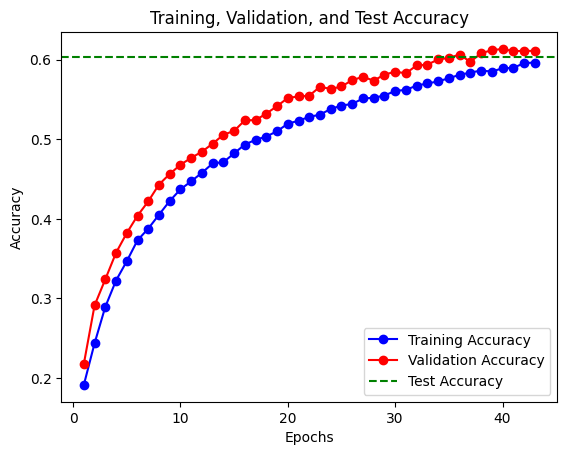

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy curves
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

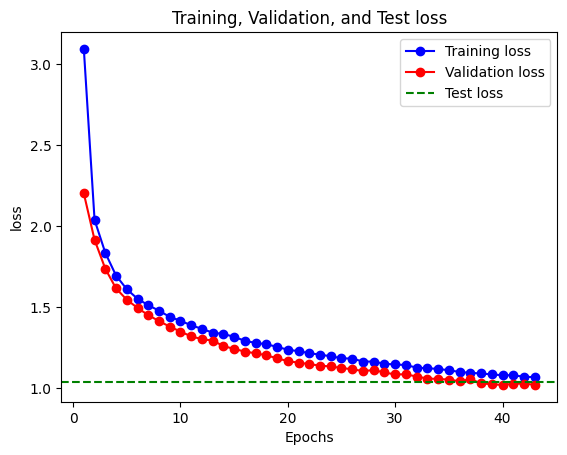

In [ ]:
import matplotlib.pyplot as plt

# Retrieve training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy curves
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.axhline(y=test_loss, color='g', linestyle='--', label='Test loss')
plt.title('Training, Validation, and Test loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Ambil data akurasi pelatihan, validasi, dan testing dari history
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
test_accuracy = history.history['test_accuracy']

# Plot grafik akurasi pelatihan, validasi, dan testing
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.plot(epochs, test_accuracy, 'g', label='Testing Accuracy')
plt.title('Training, Validation, and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


KeyError: ignored